In [ ]:
import torch

In [1]:
from google.colab import drive
import os

# Remount Google Drive
drive.mount('/content/gdrive', force_remount=True)

# Specify the dataset path
dataset_path = '/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image'

# Check if the path exists and list the files in the directory
if os.path.exists(dataset_path):
    os.chdir(dataset_path)
    print(sorted(os.listdir()))
else:
    print("Dataset not found at the specified path. Please verify the path and try again.")


Mounted at /content/gdrive
['Lidar_to_Depth.ipynb', 'nuscenes']


In [2]:
nuscenes_path = '/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image/nuscenes/python_sdk/'

# Check if the path exists and list the files in the directory
if os.path.exists(nuscenes_path):
    os.chdir(nuscenes_path)
    print(sorted(os.listdir()))
else:
    print("Dataset not found at the specified path. Please verify the path and try again.")

['nuimages', 'nuscenes', 'tutorials']


In [3]:
pwd

'/content/gdrive/My Drive/Nuscenes-Lidar-to-Depth-Image/nuscenes/python_sdk'

In [4]:
!pip install pyquaternion

In [5]:
from nuscenes import NuScenes


In [6]:
nuscenes_mini_path = '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-mini/'


# from nuscenes import NuScenes

# Initialize the NuScenes dataset
nusc = NuScenes('v1.0-mini', dataroot=nuscenes_mini_path)

# Access and work with different parts of the dataset
scene = nusc.scene[0]  # Access the first scene
sample_token = scene['first_sample_token']
sample = nusc.get('sample', sample_token)  # Access the sample

# Work with the data (e.g., lidar point clouds, annotations, etc.)
# Example: Access lidar data
lidar_data = nusc.get('sample_data', sample['data']['LIDAR_TOP'])
# Continue working with the dataset as needed


Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.576 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


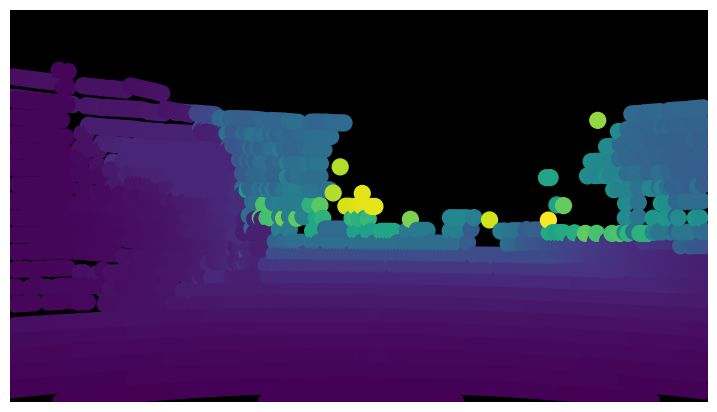

In [7]:

my_sample = nusc.sample[1]
nusc.render_lidar_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP',dot_size=130)

In [8]:
import torch
my_sample = nusc.sample[1]
nusc.render_radar_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP',dot_size=110)

NameError: name 'im' is not defined

In [ ]:
pwd

In [ ]:
from PIL import Image
import numpy as np

# Load the RGB depth image using PIL
rgb_depth_image = Image.open('/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/CAM_FRONT/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151603512404.jpg')

# Convert the image to a NumPy array
rgb_depth_array = np.array(rgb_depth_image)

# Take the average across all channels to create a grayscale image
grayscale_depth_map = np.mean(rgb_depth_array, axis=2).astype(np.uint8)

# Display or save the grayscale depth map
# Image.fromarray(grayscale_depth_map).show()

# Save the grayscale depth map using PIL
Image.fromarray(grayscale_depth_map).save('grayscale_depth_map_updated_pli.jpg')


In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
# Load the RGB depth image
rgb_depth_image = cv2.imread('/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/CAM_FRONT/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151603512404.jpg')

# Take the average across all channels to create a grayscale image
grayscale_depth_map = np.mean(rgb_depth_image, axis=2).astype(np.uint8)

# grayscale_depth_map = grayscale_depth_map[:, :, 0]
grayscale_depth_map = cv2.cvtColor(rgb_depth_image, cv2.COLOR_BGR2GRAY)


# Display or save the grayscale depth map
cv2_imshow(grayscale_depth_map)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the grayscale depth map
cv2.imwrite('grayscale_depth_map_updated.jpg', grayscale_depth_map)


In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
# Load the RGB depth image
rgb_depth_image = cv2.imread('/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/CAM_FRONT/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151603512404.jpg')

# Take the average across all channels to create a grayscale image
grayscale_depth_map = np.mean(rgb_depth_image, axis=2).astype(np.uint8)

# grayscale_depth_map = grayscale_depth_map[:, :, 0]
grayscale_depth_map = cv2.cvtColor(rgb_depth_image, cv2.COLOR_BGR2GRAY)


# Display or save the grayscale depth map
cv2_imshow(grayscale_depth_map)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the grayscale depth map
cv2.imwrite('grayscale_depth_map_updated.png', grayscale_depth_map)


In [ ]:
print('Grayscale image shape:', grayscale_depth_map.shape)

# Converting RGB Depth Map to Grayscale one

In [ ]:
import os
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

# Path to the folder containing the RGB depth images
input_folder = '/content/gdrive/My Drive/0A Praktikum/depth_output_total_final/samples/'

# Path to the folder where you want to save the grayscale depth maps
output_folder = '/content/gdrive/My Drive/0A Praktikum/depth_output_total_final/samples/grayscale_depth_maps/'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# List all files in the input folder
input_files = os.listdir(input_folder)

# Loop over each file in the folder
for input_file in input_files:
    # Check if the file is an image (you may want to add more specific checks)
    if input_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the input image
        input_image_path = os.path.join(input_folder, input_file)

        # Load the RGB depth image
        rgb_depth_image = cv2.imread(input_image_path)

        # Take the average across all channels to create a grayscale image
        grayscale_depth_map = np.mean(rgb_depth_image, axis=2).astype(np.uint8)

        # Display or save the grayscale depth map
        cv2_imshow(grayscale_depth_map)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # Construct the full path to the output image
        output_image_path = os.path.join(output_folder, input_file)

        # Save the grayscale depth map with the same name as the original image
        cv2.imwrite(output_image_path, grayscale_depth_map)


In [ ]:
from nuscenes import NuScenes  # Uncomment this line to import NuScenes

dataset_path_trainval01 = '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-trainval01_keyframes'

# Initialize the NuScenes dataset
nusc01 = NuScenes('v1.0-trainval01', dataroot=dataset_path_trainval01)  # Correct the dataset name here

# Access and work with different parts of the dataset
scene = nusc01.scene[0]  # Access the first scene
sample_token = scene['first_sample_token']
sample = nusc01.get('sample', sample_token)  # Access the sample

# Work with the data (e.g., lidar point clouds, annotations, etc.)
# Example: Access lidar data
lidar_data = nusc01.get('sample_data', sample['data']['LIDAR_TOP'])
# Continue working with the dataset as needed


In [ ]:
dataset_path_trainval01 = '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-trainval01_keyframes'


# from nuscenes import NuScenes

# Initialize the NuScenes dataset
nusc01 = NuScenes('v1.0-trainval01_keyframes', dataroot=dataset_path_trainval01)

# Access and work with different parts of the dataset
scene = nusc01.scene[0]  # Access the first scene
sample_token = scene['first_sample_token']
sample = nusc01.get('sample', sample_token)  # Access the sample

# Work with the data (e.g., lidar point clouds, annotations, etc.)
# Example: Access lidar data
lidar_data = nusc01.get('sample_data', sample['data']['LIDAR_TOP'])
# Continue working with the dataset as needed


In [ ]:
import matplotlib.pyplot as plt
# Load sample data
# sample = nusc.get('sample', sample_token)
sample = nusc.sample[1]

# Get the camera front data for the sample
camera_data = nusc.get('sample_data', sample['data']['CAM_FRONT'])

# Load the image without annotations
cam_front_image = plt.imread(dataset_path_nus + camera_data['filename'])

# Display the image without bounding boxes
plt.imshow(cam_front_image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
sample = nusc.sample[1]  # Accessing the second sample for example purposes

# Get the camera front data for the sample
camera_data = nusc.get('sample_data', sample['data']['CAM_FRONT'])

# Load the image without annotations
cam_front_image = plt.imread(dataset_path_nus + camera_data['filename'])

# Create a figure with specific dimensions
fig = plt.figure(figsize=(8, 6))  # Adjust dimensions as needed

# Display the image without bounding boxes
plt.imshow(cam_front_image)
plt.axis('off')  # Turn off axis labels

# Save the image without displaying it
# plt.savefig('cam_front_image.png', bbox_inches='tight', pad_inches=0)
# plt.close()

In [ ]:
nusc.render_annotation(my_sample['anns'][22])

In [ ]:
my_sample = nusc.sample[1]
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')

In [ ]:
# def render_pointcloud_in_sweep(self, image_path: str, **kwargs):
#         """
#         Renders pointcloud on top of an image given the image path.
#         :param image_path: Path to the image file.
#         :param kwargs: Additional keyword arguments to pass to render_pointcloud_in_image.
#         """
#         # Extract sample token from the image file name or path as needed.
#         sample_token = os.path.splitext(os.path.basename(image_path))[0]

#         # Call the render_pointcloud_in_image function with the provided image path and other arguments.
        # nusc.render_pointcloud_in_image(sample_token=sample_token, out_path=None, **kwargs)

# Example Usage:
# Assuming you have an instance of YourClass named 'your_instance'
image_path =  '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-mini/sweeps/CAM_BACK/n008-2018-08-01-15-16-36-0400__CAM_BACK__1533151603637558.jpg'

nusc.render_pointcloud_in_sweep(image_path, dot_size=5, pointsensor_channel='LIDAR_TOP', camera_channel='CAM_BACK', render_intensity=False)

In [ ]:
my_sample = nusc.sample[1]
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT',camera_channel="CAM_FRONT")

In [ ]:
nusc.render_sample_data(my_sample['data']['CAM_FRONT'])

In [ ]:
import torch
my_sample = nusc.sample[1]
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')

In [ ]:
# import torch
# my_sample = nusc.sample[1]
# nusc.render_pointcloud_in_image_black(my_sample['token'], pointsensor_channel='LIDAR_TOP',dot_size=120)

In [ ]:
# import torch
# my_sample = nusc.sample[1]
# nusc.render_pointcloud_in_image_black(my_sample['token'], pointsensor_channel='LIDAR_TOP',dot_size=130)

In [ ]:
import torch
my_sample = nusc.sample[1]
nusc.render_pointcloud_in_image_black(my_sample['token'], pointsensor_channel='LIDAR_TOP',dot_size=110, camera_channel="CAM_FRONT_LEFT")
# nusc.render_pointcloud_in_image_black_grayscale(my_sample['token'], pointsensor_channel='LIDAR_TOP',dot_size=110)

In [ ]:
import torch
my_sample = nusc.sample[1]
nusc.render_pointcloud_in_image_black(my_sample['token'], pointsensor_channel='LIDAR_TOP',dot_size=110)

In [ ]:
pwd

In [ ]:
import random
random_samples = random.sample(nusc.sample, 10)

for sample in random_samples:
    # Get the camera front data for the sample
    camera_data = nusc.get('sample_data', sample['data']['CAM_FRONT'])

    # Load the image without annotations
    cam_front_image = plt.imread(dataset_path_nus + camera_data['filename'])

    # Display the image without bounding boxes
    plt.imshow(cam_front_image)
    plt.axis('off')  # Turn off axis labels

    # Run your provided code for the point cloud in the image
    my_sample = sample
    nusc.render_pointcloud_in_image_black(my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=110)

    # Save the image without displaying it
    plt.savefig(f'cam_front_image_{sample["token"]}.jpg', bbox_inches='tight', pad_inches=0)
    plt.close()

In [ ]:
import numpy as np
# import open3d as o3d
import cv2
import os
import matplotlib.pyplot as plt

# from tools.Lidar2Camera import *
# from nuscenes.utils.data_classes import *
# from scipy.spatial.transform import Rotation as R
# from nuscenes.nuscenes import NuScenes

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through samples
counter=0
for i in range(len(nusc.scene)):
    first_sample_token = nusc.scene[i]['first_sample_token']
    my_sample = nusc.get('sample', first_sample_token)
    while True:
        cam_front_data = nusc.get(
            'sample_data', my_sample['data']['CAM_FRONT'])
        camera_file_name = os.path.basename(cam_front_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=110, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output', f"{camera_file_name}_DEPTH.png"))


        # nusc.render_pointcloud_in_image_black(
        #     my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=110,out_path=os.path.join(
        #     '/content/gdrive/My Drive/0A Praktikum/depth_output', f"output_image_{counter}.png"))

        # Save the output image to a directory:


        # output_image_path = os.path.join(
        #     '/content/gdrive/My Drive/0A Praktikum/depth_output', f"output_image_{counter}.png")
        # plt.savefig(output_image_path)  # Assuming the output is a matplotlib figure
        counter += 1  # Increment counter for the next image

        # Move to the next sample
        if my_sample['next'] == '':
            break
        else:
            my_sample = nusc.get('sample', my_sample['next'])


In [ ]:
import numpy as np
# import open3d as o3d
import cv2
import os
import matplotlib.pyplot as plt

# from tools.Lidar2Camera import *
# from nuscenes.utils.data_classes import *
# from scipy.spatial.transform import Rotation as R
# from nuscenes.nuscenes import NuScenes

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through samples
counter=0
for i in range(len(nusc.scene)):
    first_sample_token = nusc.scene[i]['first_sample_token']
    my_sample = nusc.get('sample', first_sample_token)
    if counter==20:
          break

    while True:
        cam_front_data = nusc.get(
            'sample_data', my_sample['data']['CAM_FRONT'])
        camera_file_name = os.path.basename(cam_front_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=110, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output/compare', f"{camera_file_name}_DEPTH_110.png"))

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=120, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output/compare', f"{camera_file_name}_DEPTH_120.png"))

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output/compare', f"{camera_file_name}_DEPTH_130.png"))

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=150, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output/compare', f"{camera_file_name}_DEPTH_150.png"))

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=170, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output/compare', f"{camera_file_name}_DEPTH_170.png"))

        counter += 1  # Increment counter for the next image

        # Move to the next sample
        if counter==20:
          break


        if my_sample['next'] == '':
            break
        else:
            my_sample = nusc.get('sample', my_sample['next'])


In [ ]:
print(counter)

# Running on the whole dataset

In [ ]:
print(len(nusc.scene))

# CAM_FRONT

In [ ]:
import numpy as np
# import open3d as o3d
import cv2
import os
import matplotlib.pyplot as plt

def ConverToDepth(cameraSensor): #Ex: camera == "CAM_FRONT"
  counter=0
  for i in range(len(nusc.scene)):
      print("hh")
      first_sample_token = nusc.scene[i]['first_sample_token']
      my_sample = nusc.get('sample', first_sample_token)
      # if counter==20:
      #       break

      while True:
        cam_front_data = nusc.get(
              'sample_data', my_sample['data'][cameraSensor])
        camera_file_name = os.path.basename(cam_front_data['filename'])  # Extract camera file name


          # Load the image using OpenCV
        image_path = os.path.join(
            '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-mini/samples/', f"{cameraSensor}","/", camera_file_name
        )
        print(image_path)
        image = cv2.imread(image_path)

        # Display the image using Matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"{cameraSensor} - {camera_file_name}")
        plt.show()

          # Rendering the point cloud on the image

          # nusc.render_pointcloud_in_image_black(
          #     my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
          #         '/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/', f"{camera}",'/' f"{camera_file_name}"))



        counter += 1  # Increment counter for the next image

          # Move to the next sample
          # if counter==20:
          #   break


        if my_sample['next'] == '':
            break
        else:
            my_sample = nusc.get('sample', my_sample['next'])
  print(counter)
  ConverToDepth("CAM_FRONT")

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def ConverToDepth(camera_channel):  # Ex: camera == "CAM_FRONT"
    counter = 0
    for i in range(len(nusc.scene)):
        print("hh")
        first_sample_token = nusc.scene[i]['first_sample_token']
        my_sample = nusc.get('sample', first_sample_token)

        while True:
            cam_front_data = nusc.get(
                'sample_data', my_sample['data'][camera_channel])
            camera_file_name = os.path.basename(
                cam_front_data['filename'])  # Extract camera file name

            # Load the image using OpenCV
            # image_path = os.path.join(
            #     '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-mini/samples/', f"{camera_channel}", "/", camera_file_name
            # )
            # print(image_path)
            # image = cv2.imread(image_path)

            # # Display the image using Matplotlib
            # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # plt.title(f"{camera_channel} - {camera_file_name}")
            # plt.show()

            nusc.render_pointcloud_in_image_black(
              my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
                  '/content/gdrive/My Drive/0A Praktikum/depth_output_total_final/samples/', camera_file_name),
              camera_channel=camera_channel
              )
            counter += 1  # Increment counter for the next image

            # Move to the next sample
            if my_sample['next'] == '':
                break
            else:
                my_sample = nusc.get('sample', my_sample['next'])

    print(counter)


# Example
ConverToDepth("CAM_BACK")
ConverToDepth("CAM_BACK_RIGHT")
ConverToDepth("CAM_BACK_LEFT")

ConverToDepth("CAM_FRONT_RIGHT")
ConverToDepth("CAM_FRONT_LEFT")
ConverToDepth("CAM_FRONT")






In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

def ConverToDepthRadar(camera_channel,radar_channel):  # Ex: camera == "CAM_FRONT"
    counter = 0
    for i in range(len(nusc.scene)):
        print("hh")
        first_sample_token = nusc.scene[i]['first_sample_token']
        my_sample = nusc.get('sample', first_sample_token)

        while True:
            cam_front_data = nusc.get(
                'sample_data', my_sample['data'][camera_channel])
            camera_file_name = os.path.basename(
                cam_front_data['filename'])  # Extract camera file name

            # Load the image using OpenCV
            # image_path = os.path.join(
            #     '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-mini/samples/', f"{camera_channel}", "/", camera_file_name
            # )
            # print(image_path)
            # image = cv2.imread(image_path)

            # # Display the image using Matplotlib
            # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # plt.title(f"{camera_channel} - {camera_file_name}")
            # plt.show()

            nusc.render_pointcloud_in_image_black_radar(
              my_sample['token'], pointsensor_channel=radar_channel, dot_size=130, lidar_depth_path=os.path.join(
                  '/content/gdrive/My Drive/0A Praktikum/depth_output_total_final/samples/', camera_file_name),
              out_path=os.path.join(
                  '/content/gdrive/My Drive/0A Praktikum/depth_output_total_final/samples/radar', camera_file_name),
              camera_channel=camera_channel
              )
            counter += 1  # Increment counter for the next image

            # Move to the next sample
            if my_sample['next'] == '':
                break
            else:
                my_sample = nusc.get('sample', my_sample['next'])

    print(counter)


# Example
# ConverToDepth("CAM_BACK")
# ConverToDepth("CAM_BACK_RIGHT")
# ConverToDepth("CAM_BACK_LEFT")

# ConverToDepth("CAM_FRONT_RIGHT")
# ConverToDepth("CAM_FRONT_LEFT")
ConverToDepthRadar("CAM_FRONT","RADAR_FRONT")






# CAM_BACK

In [ ]:
import numpy as np
# import open3d as o3d
import cv2
import os
import matplotlib.pyplot as plt

# from tools.Lidar2Camera import *
# from nuscenes.utils.data_classes import *
# from scipy.spatial.transform import Rotation as R
# from nuscenes.nuscenes import NuScenes

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through samples
counter=0
for i in range(len(nusc.scene)):
    first_sample_token = nusc.scene[i]['first_sample_token']
    my_sample = nusc.get('sample', first_sample_token)
    # if counter==20:
    #       break

    while True:
        cam_back_data = nusc.get(
            'sample_data', my_sample['data']['CAM_BACK'])
        camera_file_name = os.path.basename(cam_back_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/CAM_BACK', f"{camera_file_name}"))



        counter += 1  # Increment counter for the next image

        # Move to the next sample
        # if counter==20:
        #   break


        if my_sample['next'] == '':
            break
        else:
            my_sample = nusc.get('sample', my_sample['next'])
print(counter)

# CAM_BACK_LEFT

In [ ]:
import numpy as np
# import open3d as o3d
import cv2
import os
import matplotlib.pyplot as plt

# from tools.Lidar2Camera import *
# from nuscenes.utils.data_classes import *
# from scipy.spatial.transform import Rotation as R
# from nuscenes.nuscenes import NuScenes

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through samples
counter=0
for i in range(len(nusc.scene)):
    first_sample_token = nusc.scene[i]['first_sample_token']
    my_sample = nusc.get('sample', first_sample_token)
    # if counter==20:
    #       break

    while True:
        cam_back_data = nusc.get(
            'sample_data', my_sample['data']['CAM_BACK_LEFT'])
        camera_file_name = os.path.basename(cam_back_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/CAM_BACK_LEFT', f"{camera_file_name}"))



        counter += 1  # Increment counter for the next image

        # Move to the next sample
        # if counter==20:
        #   break


        if my_sample['next'] == '':
            break
        else:
            my_sample = nusc.get('sample', my_sample['next'])
print(counter)

# CAM_BACK_RIGHT

In [ ]:
import numpy as np
# import open3d as o3d
import cv2
import os
import matplotlib.pyplot as plt

# from tools.Lidar2Camera import *
# from nuscenes.utils.data_classes import *
# from scipy.spatial.transform import Rotation as R
# from nuscenes.nuscenes import NuScenes

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through samples
counter=0
for i in range(len(nusc.scene)):
    first_sample_token = nusc.scene[i]['first_sample_token']
    my_sample = nusc.get('sample', first_sample_token)
    # if counter==20:
    #       break

    while True:
        cam_data = nusc.get(
            'sample_data', my_sample['data']['CAM_BACK_RIGHT'])
        camera_file_name = os.path.basename(cam_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/CAM_BACK_RIGHT', f"{camera_file_name}"))



        counter += 1  # Increment counter for the next image

        # Move to the next sample
        # if counter==20:
        #   break


        if my_sample['next'] == '':
            break
        else:
            my_sample = nusc.get('sample', my_sample['next'])
print(counter)

# CAM_FRONT_RIGHT

In [ ]:
import numpy as np
# import open3d as o3d
import cv2
import os
import matplotlib.pyplot as plt

# from tools.Lidar2Camera import *
# from nuscenes.utils.data_classes import *
# from scipy.spatial.transform import Rotation as R
# from nuscenes.nuscenes import NuScenes

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through samples
counter=0
for i in range(len(nusc.scene)):
    first_sample_token = nusc.scene[i]['first_sample_token']
    my_sample = nusc.get('sample', first_sample_token)
    # if counter==20:
    #       break

    while True:
        cam_data = nusc.get(
            'sample_data', my_sample['data']['CAM_FRONT_RIGHT'])
        camera_file_name = os.path.basename(cam_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/CAM_FRONT_RIGHT', f"{camera_file_name}"))



        counter += 1  # Increment counter for the next image

        # Move to the next sample
        # if counter==20:
        #   break


        if my_sample['next'] == '':
            break
        else:
            my_sample = nusc.get('sample', my_sample['next'])
print(counter)

# CAM_FRONT_LEFT

In [ ]:

import numpy as np
# import open3d as o3d
import cv2
import os
import matplotlib.pyplot as plt

# from tools.Lidar2Camera import *
# from nuscenes.utils.data_classes import *
# from scipy.spatial.transform import Rotation as R
# from nuscenes.nuscenes import NuScenes

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through samples
counter=0
for i in range(len(nusc.scene)):
    first_sample_token = nusc.scene[i]['first_sample_token']
    my_sample = nusc.get('sample', first_sample_token)
    # if counter==20:
    #       break

    while True:
        cam_data = nusc.get(
            'sample_data', my_sample['data']['CAM_FRONT_LEFT'])
        camera_file_name = os.path.basename(cam_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image

        nusc.render_pointcloud_in_image_black(
            my_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output_total/samples/CAM_FRONT_LEFT', f"{camera_file_name}"))



        counter += 1  # Increment counter for the next image

        # Move to the next sample
        # if counter==20:
        #   break


        if my_sample['next'] == '':
            break
        else:
            my_sample = nusc.get('sample', my_sample['next'])
print(counter)


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through scenes
counter = 0
for scene in nusc.scene:
    first_sample_token = scene['first_sample_token']
    current_sample = nusc.get('sample', first_sample_token)

    while True:
        lidar_data = nusc.get('sample_data', current_sample['data']['LIDAR_TOP'])
        lidar_file_name = os.path.basename(lidar_data['filename'])  # Extract LIDAR file name

        camera_data = nusc.get('sample_data', current_sample['data']['CAM_FRONT'])
        camera_file_name = os.path.basename(camera_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image
        nusc.render_pointcloud_in_image_black(
            current_sample['token'], pointsensor_channel='LIDAR_TOP', cam_channel='CAM_FRONT', out_path=os.path.join(
                '/content/gdrive/My Drive/0A Praktikum/depth_output_total/sweeps/CAM_FRONT', f"{camera_file_name}"))

        counter += 1  # Increment counter for the next image

        if current_sample['next'] == '':
            break
        else:
            current_sample = nusc.get('sample', current_sample['next'])

print(counter)


# CAM_FRONT - sweeps (not working)

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# ... (previous code remains unchanged)

# Your existing code up to this point remains the same

# Assuming `nusc` and other initializations are already done

# Loop through scenes
counter = 0
for scene in nusc.scene:
    first_sample_token = scene['first_sample_token']
    current_sample = nusc.get('sample', first_sample_token)

    while True:
        lidar_data = nusc.get('sample_data', current_sample['data']['LIDAR_TOP'])
        lidar_file_name = os.path.basename(lidar_data['filename'])  # Extract LIDAR file name

        camera_data = nusc.get('sample_data', current_sample['data']['CAM_FRONT'])
        camera_file_name = os.path.basename(camera_data['filename'])  # Extract camera file name

        # Rendering the point cloud on the image without specifying camera channel
        # nusc.render_pointcloud_in_image_black(
        #     current_sample['token'], pointsensor_channel='LIDAR_TOP', dot_size=130, out_path=os.path.join(
        #         '/content/gdrive/My Drive/0A Praktikum/depth_output_total/sweeps/CAM_FRONT', f"{camera_file_name}"))

        counter += 1  # Increment counter for the next image

        if current_sample['next'] == '':
            break
        else:
            current_sample = nusc.get('sample', current_sample['next'])

print(counter)


In [ ]:
sample_token = scene['first_sample_token']
sample = nusc.get('sample', sample_token)
token = sample['data']['CAM_FRONT_RIGHT']
counter = 0
while token != '':
    data = nusc.get('sample_data', token)
    counter+=1
    token = data["next"]
print(counter)

In [ ]:
|# from nuscenes.nuscenes import NuScenes

# Provide the path to your nuScenes dataset
# nusc = NuScenes(version='v1.0-mini', dataroot='/path/to/your/mini/dataset', verbose=True)

# Get all sample data for the front camera sweeps
camera_channel = 'CAM_FRONT'
camera_data = nusc.get('sample_data', nusc.field2token('sample_data', 'channel', camera_channel))

# Initialize counter for CAM_FRONT images in the sweeps folder
count_sweeps = 0

# Count the number of CAM_FRONT images in sweeps
for data in camera_data:
    sample_token = data['sample_token']
    sweeps = nusc.get('sample', sample_token)['data']

    for sweep in sweeps:
        if sweep['channel'] == camera_channel:
            count_sweeps += 1

print(f"Number of CAM_FRONT images in 'sweeps' folder: {count_sweeps}")


In [ ]:
# ample_token = 'your_sample_token_here'

# Load sample data
# sample = nusc.get('sample', sample_token)

# Get the camera front data for the sample
camera_data = nusc.get('sample_data', sample['data']['CAM_FRONT'])

# Load the image without annotations
cam_front_image = plt.imread('/path/to/your/nuScenes/' + camera_data['filename'])

# Display the image without bounding boxes
plt.imshow(cam_front_image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Define the __getitem__ function and its components here
# ...

# Function to simulate the __getitem__ functionality for the sake of example
def simulate_getitem(index):
    # Simulating the functionality of __getitem__
    # ... (Your implementation of __getitem__ goes here)
    # Sample output for simulation
    image_path = 'point.jpeg'  # Example image path
    im = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Simulating image loading

    # Process depth or other relevant data from the function
    # ... (Your processing logic goes here)
    depth = im.astype(np.float32)
    normalized_depth = (depth - np.min(depth)) / (np.max(depth) - np.min(depth))

    return normalized_depth  # Example return statement for simulation

# Load your 2D image (black and white) obtained from LiDAR projection using the simulated function
image_depth = simulate_getitem(0)  # Simulated call to simulate_getitem

# Check if the image is loaded properly
if image_depth is None:
    print("Error loading the image")
else:
    # Map depth values to colors using a colormap (e.g., from Matplotlib)
    depth_colormap = plt.cm.jet(image_depth)  # You can choose any colormap

    # Convert colormap to uint8 for OpenCV visualization
    depth_colormap_uint8 = (depth_colormap[:, :, :3] * 255).astype(np.uint8)

    # Display the depth-encoded color image using cv2_imshow
    cv2_imshow(depth_colormap_uint8)


In [ ]:
def lidar_to_depth_image(lidar_point_cloud, camera_calibration_matrix):
  """Projects a lidar point cloud onto the camera image plane and converts it to a depth image.

  Args:
    lidar_point_cloud: A numpy array of lidar points, in the lidar coordinate frame.
    camera_calibration_matrix: A numpy array of the lidar-to-camera calibration matrix.

  Returns:
    A numpy array of the depth image, in pixels.
  """

  # Project the lidar point cloud onto the camera image plane.
  projected_points = camera_calibration_matrix @ lidar_point_cloud

  # Remove any points that fall outside of the image boundaries.
  valid_points = projected_points[:, 0] >= 0
  valid_points &= projected_points[:, 1] >= 0
  valid_points &= projected_points[:, 0] < image_width
  valid_points &= projected_points[:, 1] < image_height

  # For each pixel in the image, find the closest lidar point.
  depth_image = np.zeros((image_height, image_width))
  for y in range(image_height):
    for x in range(image_width):
      closest_point_index = np.argmin(np.linalg.norm(projected_points[valid_points] - [x, y], axis=1))
      depth_image[y, x] = projected_points[valid_points][closest_point_index][2]

  return depth_image


In [ ]:
def depth_to_color(depth):
  """Converts a depth value to a color.

  Args:
    depth: A depth value in meters.

  Returns:
    A tuple of (red, green, blue) values in the range [0, 255].
  """

  # Normalize the depth to the range [0, 1].
  normalized_depth = depth / MAX_DEPTH

  # Convert the normalized depth to a color using a colormap.
  color = cmap(normalized_depth)

  # Return the color as a tuple of (red, green, blue) values.
  return color[0] * 255, color[1] * 255, color[2] * 255


In [ ]:
import numpy as np
import cv2
from scipy.interpolate import LinearNDInterpolator

# Load the image
image_path = 'point.jpeg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Create a mask where black pixels are True
mask = np.all(image == [0, 0, 0], axis=-1)

# Find the indices of non-black pixels
non_black_indices = np.array(np.nonzero(~mask)).T

# Get the color values of non-black pixels
non_black_values = image[~mask]

# Create an interpolator
interpolator = LinearNDInterpolator(non_black_indices, non_black_values)

# Find the indices of black pixels
black_indices = np.array(np.nonzero(mask)).T

# Interpolate the color values
interpolated_values = interpolator(black_indices).astype(np.uint8)

# Assign the interpolated values back to the image
image[mask] = interpolated_values

# Save the image
output_path = 'output_image.jpeg'  # Replace with the path for the output image
cv2.imwrite(output_path, image)

In [ ]:
import cv2
import numpy as np

# Load the image
# image_path = 'your_image_path_here.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert the image to grayscale to create a mask
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a mask with the black areas as the foreground
# Here, we assume black areas have very low pixel values, close to zero
_, mask = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY_INV)

# Perform inpainting using the mask
# The third parameter is the inpaint radius, which decides the size of the area to inpaint at once.
# The last parameter is the inpainting method; cv2.INPAINT_TELEA is one of the algorithms provided by OpenCV.
inpainted_image = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

# Save the inpainted image
output_path = 'inpainted_image.jpg'  # Choose your output path
cv2.imwrite(output_path, inpainted_image)

print(f"The inpainted image is saved as {output_path}")

In [ ]:
import cv2
import numpy as np

# Load your black and white image
# image_path = 'path_to_your_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform some dummy depth estimation for demonstration
# Replace this part with your actual depth estimation method or model
depth_map = np.random.rand(image.shape[0], image.shape[1]) * 255
depth_map = depth_map.astype(np.uint8)

# Save the estimated depth map
depth_map_path = 'depth_map.png'
cv2.imwrite(depth_map_path, depth_map)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load your 2D image (black and white) obtained from LiDAR projection
image = cv2.imread( 'point.jpeg' , cv2.IMREAD_GRAYSCALE)


# Load your 2D image (black and white) obtained from LiDAR projection
image = cv2.imread('path/to/your/image.png', cv2.IMREAD_GRAYSCALE)

# Assuming your 2D image is already in camera coordinates

# Calculate depth based on the intensity values of the 2D image
depth = image.astype(np.float32)  # Assuming intensity corresponds to depth (e.g., darker means closer)

# Normalize depth values (optional, depending on the range)
normalized_depth = (depth - np.min(depth)) / (np.max(depth) - np.min(depth))

# Map depth values to colors using a colormap (e.g., from Matplotlib)
depth_colormap = plt.cm.jet(normalized_depth)  # You can choose any colormap

# Convert colormap to uint8 for OpenCV visualization
depth_colormap_uint8 = (depth_colormap[:, :, :3] * 255).astype(np.uint8)

# Display the depth-encoded color image using cv2_imshow
cv2_imshow(depth_colormap_uint8)



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load your 2D image (black and white) obtained from LiDAR projection
image_path = 'point.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print(f"Error loading image at path: {image_path}")
else:
    # Assuming your 2D image is already in camera coordinates

    # Calculate depth based on the intensity values of the 2D image
    depth = image.astype(np.float32)  # Assuming intensity corresponds to depth (e.g., darker means closer)

    # Normalize depth values (optional, depending on the range)
    normalized_depth = (depth - np.min(depth)) / (np.max(depth) - np.min(depth))

    # Map depth values to colors using a colormap (e.g., from Matplotlib)
    depth_colormap = plt.cm.jet(normalized_depth)  # You can choose any colormap

    # Convert colormap to uint8 for OpenCV visualization
    depth_colormap_uint8 = (depth_colormap[:, :, :3] * 255).astype(np.uint8)

    # Display the depth-encoded color image using cv2_imshow
    cv2_imshow(depth_colormap_uint8)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load your 2D image (black and white) obtained from LiDAR projection
# image_path = 'pao/your/image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print(f"Error loading image at path: {image_path}")
else:
    # Assuming your 2D image is already in camera coordinates

    # Calculate depth based on the intensity values of the 2D image
    depth = image.astype(np.float32)  # Assuming intensity corresponds to depth (e.g., darker means closer)

    # Normalize depth values (optional, depending on the range)
    normalized_depth = (depth - np.min(depth)) / (np.max(depth) - np.min(depth))

    # Define depth ranges for the color mapping (adjust these as needed)
    # Assigning yellow to the closest, red, blue, and black to the farthest
    depth_ranges = [(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0)]
    colors = [(0, 255,255 ), (0, 0, 255), (255, 0, 0), (0, 0, 0)]

    # Create an empty color map
    depth_colormap = np.zeros((depth.shape[0], depth.shape[1], 3), dtype=np.uint8)

    # Map depth values to colors based on ranges
    for i, (lower, upper) in enumerate(depth_ranges):
        mask = np.logical_and(normalized_depth >= lower, normalized_depth <= upper)
        depth_colormap[mask] = colors[i]

    # Display the depth-encoded color image using cv2_imshow
    cv2_imshow(depth_colormap)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load your 2D image (black and white) obtained from LiDAR projection
# image_path = 'path/to/your/image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print(f"Error loading image at path: {image_path}")
else:
    # Assuming your 2D image is already in camera coordinates

    # Calculate depth based on the intensity values of the 2D image
    depth = image.astype(np.float32)  # Assuming intensity corresponds to depth (e.g., darker means closer)

    # Normalize depth values and invert them to reverse the perception
    normalized_depth = 1 - (depth - np.min(depth)) / (np.max(depth) - np.min(depth))

    # Define depth ranges for the color mapping (adjust these as needed)
    # Assigning yellow to the closest, red, blue, and black to the farthest
    depth_ranges = [(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0)]
    colors = [(0, 255, 255), (0, 0, 255), (255, 0, 0), (0, 0, 0)]

    # Create an empty color map
    depth_colormap = np.zeros((depth.shape[0], depth.shape[1], 3), dtype=np.uint8)

    # Map depth values to colors based on ranges
    for i, (lower, upper) in enumerate(depth_ranges):
        mask = np.logical_and(normalized_depth >= lower, normalized_depth <= upper)
        depth_colormap[mask] = colors[i]

    # Display the depth-encoded color image using cv2_imshow
    cv2_imshow(depth_colormap)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load your 2D image (black and white) obtained from LiDAR projection
image_path = 'point.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print(f"Error loading image at path: {image_path}")
else:
    # Assuming your 2D image is already in camera coordinates

    # Calculate depth based on the intensity values of the 2D image
    depth = image.astype(np.float32)  # Assuming intensity corresponds to depth (e.g., darker means closer)

    # Normalize depth values and invert them to reverse the perception
    normalized_depth = 1 - (depth - np.min(depth)) / (np.max(depth) - np.min(depth))

    # Define depth ranges for the color mapping (adjust these as needed)
    # Assigning yellow to the closest, red, blue, and black to the farthest
    depth_ranges = [(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0)]
    colors = [(0, 255, 255), (0, 0, 255), (255, 0, 0), (0, 0, 0)]

    # Create an empty color map
    depth_colormap = np.zeros((depth.shape[0], depth.shape[1], 3), dtype=np.uint8)

    # Map depth values to colors based on ranges
    for i, (lower, upper) in enumerate(depth_ranges):
        mask = np.logical_and(normalized_depth >= lower, normalized_depth <= upper)
        depth_colormap[mask] = colors[i]

    # Define function to fill gaps between same-colored pixels
    def fill_color_gaps(img):
        for y in range(img.shape[0]):
            last_color = None
            start_x = None
            for x in range(img.shape[1]):
                color = tuple(img[y, x])
                if color != last_color:
                    if last_color is not None:
                        end_x = x - 1
                        if start_x is not None and end_x > start_x:
                            cv2.line(img, (start_x, y), (end_x, y), tuple(int(c) for c in last_color), 1)
                    last_color = color
                    start_x = x

    # Fill the color gaps in the depth-encoded color image
    filled_depth_colormap = depth_colormap.copy()
    fill_color_gaps(filled_depth_colormap)

    # Display the depth-encoded color image with filled gaps using cv2_imshow
    cv2_imshow(filled_depth_colormap)


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your 2D image (black and white) obtained from LiDAR projection
image = cv2.imread('point.jpeg', cv2.IMREAD_GRAYSCALE)

# Assuming your 2D image is already in camera coordinates

# Calculate depth based on the intensity values of the 2D image
depth = image.astype(np.float32)  # Assuming intensity corresponds to depth (e.g., darker means closer)

# Normalize depth values (optional, depending on the range)
normalized_depth = (depth - np.min(depth)) / (np.max(depth) - np.min(depth))

# Define depth ranges for the color mapping
depth_ranges = [(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0)]
colors = [(0, 255, 255), (0, 0, 255), (255, 0, 0), (0, 0, 0)]

# Create an empty color map
depth_colormap = np.zeros((depth.shape[0], depth.shape[1], 3), dtype=np.uint8)

# Map depth values to colors based on defined ranges
for i, (lower, upper) in enumerate(depth_ranges):
    mask = np.logical_and(normalized_depth >= lower, normalized_depth <= upper)
    depth_colormap[mask] = colors[i]

# Display the depth-encoded color image using cv2_imshow
cv2_imshow(depth_colormap)


In [ ]:
def depth_to_three_color(depth):
    # Define three color ranges
    threshold1 = 0.4
    threshold2 = 0.6

    if depth < threshold1:
        color = (255, 255, 0)  # Yellow
    elif depth < threshold2:
        color = (255, 0, 0)  # Red
    else:
        color = (0, 0, 0)  # Black

    return color


depth_colormap = np.zeros((depth.shape[0], depth.shape[1], 3), dtype=np.uint8)
for y in range(depth.shape[0]):
    for x in range(depth.shape[1]):
        # Map depth values to colors using the defined function
        color = depth_to_three_color(depth[y, x])

        # Set the corresponding pixel in the colormap to the calculated color
        depth_colormap[y, x] = color


depth_colormap_uint8 = depth_colormap.copy()

# Convert colormap to uint8 for OpenCV visualization
depth_colormap_uint8 = depth_colormap_uint8.astype(np.uint8)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the 2D image (black and white) obtained from LiDAR projection
image_path = 'point.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print(f"Error loading image at path: {image_path}")
else:
    print("Image loaded successfully.")

depth = image.astype(np.float32)  # Assuming intensity corresponds to depth (e.g., darker means closer)

# Define three color ranges
threshold1 = 0.4
threshold2 = 0.6

def depth_to_three_color(depth):
    if depth < threshold1:
        color = (255, 255, 0)  # Yellow
    elif depth < threshold2:
        color = (255, 0, 0)  # Red
    else:
        color = (0, 0, 0)  # Black
    return color

# Map depth values to colors and convert to color image
depth_colormap = np.zeros((depth.shape[0], depth.shape[1], 3), dtype=np.uint8)
for y in range(depth.shape[0]):
    for x in range(depth.shape[1]):
        color = depth_to_three_color(depth[y, x])
        depth_colormap[y, x] = color

depth_colormap_uint8 = depth_colormap.copy()

# Convert colormap to uint8 for OpenCV visualization
depth_colormap_uint8 = depth_colormap_uint8.astype(np.uint8)

# Display the depth-encoded color image using OpenCV
cv2.imshow('Depth Image', depth_colormap_uint8)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your 2D image (black and white) obtained from LiDAR projection
image = cv2.imread('point.jpeg', cv2.IMREAD_GRAYSCALE)

# Assuming your 2D image is already in camera coordinates

# Calculate depth based on the intensity values of the 2D image
depth = image.astype(np.float32)  # Assuming intensity corresponds to depth (e.g., darker means closer)

# Normalize depth values (optional, depending on the range)
normalized_depth = (depth - np.min(depth)) / (np.max(depth) - np.min(depth))

# Define depth ranges for the color mapping
depth_ranges = [(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0)]
colors = [(0, 255, 255), (0, 0, 255), (255, 0, 0), (0, 0, 0)]

# Create an empty color map
depth_colormap = np.zeros((depth.shape[0], depth.shape[1], 3), dtype=np.uint8)

# Map depth values to colors based on defined ranges
for i, (lower, upper) in enumerate(depth_ranges):
    mask = np.logical_and(normalized_depth >= lower, normalized_depth <= upper)
    depth_colormap[mask] = colors[i]

# Display the depth-encoded color image using Matplotlib
plt.imshow(cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
# import numpy as np
# from google.colab.patches import cv2_imshow
# import cv2

# # Assuming you have a point cloud in the format: [x, y, z, intensity]
# point_cloud = np.array([
#     [1.0, 2.0, 3.0, 0.8],
#     [4.0, 5.0, 6.0, 0.5],
#     # Add more points as needed
# ])

# # Dummy camera parameters (intrinsic matrix and rotation matrix)
# camera_intrinsic = np.array([
#     [1000, 0, 320],
#     [0, 1000, 240],
#     [0, 0, 1]
# ])

# # Dummy camera rotation matrix
# camera_rotation = np.array([
#     [1, 0, 0],
#     [0, 1, 0],
#     [0, 0, 1]
# ])

# # Dummy camera translation
# camera_translation = np.array([0, 0, 0])

# # Transform points to camera coordinate system
# points_cam = np.copy(point_cloud[:, :3])  # Copy only XYZ
# points_cam -= camera_translation  # Translate
# points_cam = np.dot(points_cam, camera_rotation.T)  # Rotate

# # Perspective projection
# points_img_homogeneous = np.dot(points_cam, camera_intrinsic.T)
# points_img = points_img_homogeneous / points_img_homogeneous[:, [2]]

# # Create a blank image
# image = np.zeros((480, 640, 3), dtype=np.uint8)

# # Scale the projected points to fit within the image size
# points_img[:, 0] *= 10  # Scale X
# points_img[:, 1] *= 10  # Scale Y

# # Plot the projected points onto the image
# for point in points_img:
#     x, y = int(point[0]), int(point[1])
#     cv2.circle(image, (x, y), 1, (0, 255, 0), -1)  # Draw a point

# # Display the image using cv2_imshow
# cv2_imshow(image)


In [ ]:
# !pip install nuscenes-devkit


In [ ]:
import os
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
from nuscenes.utils.geometry_utils import view_points
from PIL import Image
import numpy as np
import torch

# Assuming your nuScenes dataset is in a folder named "nuScenes_data" in your Google Drive
# data_root = '/content/drive/My Drive/0A Praktikum/nuscenes/v1.0-mini'  # Change this path as per your directory structure
# data_root = '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-mini/'
dataset_path = '/content/gdrive/My Drive/0A Praktikum/nuscenes/v1.0-mini/'
# nusc = NuScenes(version='v1.0-mini', dataroot=data_root, verbose=True)
nusc = NuScenes('v1.0-mini', dataroot=dataset_path)

class NuScenesDataset:
    def __init__(self, nusc):
        self._nusc = nusc
        # Define your transformations here (img_transform, etc.)

    def __getitem__(self, index):
        # Replace this code with your logic to load and process the data as shown in your previous code snippet
        # Index to token, get relevant data and tokens
        # ...
        # Your existing logic to load point cloud, image, apply transformations, and project point cloud onto image
        # ...
        NUSCENES_CAM_NAMES = [
            "CAM_FRONT",
            "CAM_FRONT_LEFT",
            "CAM_FRONT_RIGHT",
            "CAM_BACK_LEFT",
            "CAM_BACK_RIGHT",
            "CAM_BACK",
        ]
        sample_token = self._frames[index // len(NUSCENES_CAM_NAMES)]
        cam_name = NUSCENES_CAM_NAMES[index % len(NUSCENES_CAM_NAMES)]

        sample_record = self._nusc.get("sample", sample_token)
        pointsensor_token = sample_record["data"][NUSCENES_LIDAR_NAME]
        camera_token = sample_record["data"][cam_name]

        cam = self._nusc.get("sample_data", camera_token)
        pointsensor = self._nusc.get("sample_data", pointsensor_token)
        pcl_path = osp.join(self._nusc.dataroot, pointsensor["filename"])

        # Load point cloud
        pc = LidarPointCloud.from_file(pcl_path)

        # Load image
        im = Image.open(osp.join(self._nusc.dataroot, cam["filename"]))

        # Apply transforms
        og_size = im.size
        im = self._img_transform(im)
        new_size = im.shape[1:]

        # Points live in the point sensor frame. So they need to be transformed via global to the image plane.
        # First step: transform the pointcloud to the ego vehicle frame for the timestamp of the sweep.
        cs_record = self._nusc.get("calibrated_sensor", pointsensor["calibrated_sensor_token"])
        pc.rotate(Quaternion(cs_record["rotation"]).rotation_matrix)
        pc.translate(np.array(cs_record["translation"]))

        # Second step: transform from ego to the global frame.
        poserecord = self._nusc.get("ego_pose", pointsensor["ego_pose_token"])
        pc.rotate(Quaternion(poserecord["rotation"]).rotation_matrix)
        pc.translate(np.array(poserecord["translation"]))

        # Third step: transform from global into the ego vehicle frame for the timestamp of the image.
        poserecord = self._nusc.get("ego_pose", cam["ego_pose_token"])
        pc.translate(-np.array(poserecord["translation"]))
        pc.rotate(Quaternion(poserecord["rotation"]).rotation_matrix.T)

        # Fourth step: transform from ego into the camera.
        cs_record = self._nusc.get("calibrated_sensor", cam["calibrated_sensor_token"])
        pc.translate(-np.array(cs_record["translation"]))
        pc.rotate(Quaternion(cs_record["rotation"]).rotation_matrix.T)

        # Fifth step: actually take a "picture" of the point cloud.
        # Grab the depths (camera frame z axis points away from the camera).
        depths = pc.points[2, :]

        # Take the actual picture (matrix multiplication with camera-matrix + renormalization).
        points = view_points(
            pc.points[:3, :], np.array(cs_record["camera_intrinsic"]), normalize=True
        )

        # Remove points that are either outside or behind the camera. Leave a margin of 1 pixel for aesthetic reasons.
        # Also make sure points are at least 1m in front of the camera to avoid seeing the lidar points on the camera
        # casing for non-keyframes which are slightly out of sync.
        w_og, h_og = og_size
        left_border = w_og // 2 - h_og // 2
        right_border = w_og // 2 + h_og // 2
        mask = np.ones(depths.shape[0], dtype=bool)
        mask = np.logical_and(mask, depths > self.min_dist)
        mask = np.logical_and(mask, points[0, :] > left_border)
        mask = np.logical_and(mask, points[0, :] < right_border)
        mask = np.logical_and(mask, points[1, :] >= 0)
        mask = np.logical_and(mask, points[1, :] <= h_og)

        points_cam = torch.as_tensor(pc.points[:, mask].T)
        # shift from cam coords to KITTI style (x-forward, y-left, z-up)
        points_cam = points_cam[:, (2, 0, 1, 3)]
        points_cam[:, 1] = -points_cam[:, 1]
        points_cam[:, 2] = -points_cam[:, 2]
        points_cam[:, 3] /= NUSCENES_INTENSITY_MAX
        return im, points_cam.contiguous()  # Replace im and points_cam with your processed data

# Initialize the dataset
nusc_dataset = NuScenesDataset(nusc)

# Get a sample from the dataset (replace `index` with the sample index you want to visualize)
sample_index = 0  # Change this index as needed
im, points_cam = nusc_dataset[sample_index]

# Visualize the processed data (you'll need to adapt this code based on your transformations)
# Display the image using cv2_imshow
from google.colab.patches import cv2_imshow
image = np.array(im)
cv2_imshow(image)


In [ ]:
from torch.utils.data import DataLoader, Dataset

class NuscenesImageLidarDataset(Dataset):
    def __init__(
        self,
        data_root: str,
        img_transform,
        split: str = "train",
        min_dist: float = 0.5,
    ) -> None:
        super().__init__()
        self._data_root = data_root
        self._img_transform = img_transform
        self._nusc = NuScenes(
            version=NUSCENES_SPLITS[split], dataroot=self._data_root, verbose=True
        )
        self._frames = self._setup(split)
        self.min_dist = min_dist
        gc.collect()

    def _setup(self, split: str):
        splits = deepcopy(create_splits_scenes())
        if split == "train-only":
            split = "train"
        if split == "trainval":
            split = "train"
            splits["train"].extend(splits["val"])
        elif split == "mini":
            split = "mini_train"
            splits["mini_train"].extend(splits["mini_val"])

        ok_scenes = splits[split]

        ok_scene_tokens = [
            scene["token"] for scene in self._nusc.scene if scene["name"] in ok_scenes
        ]
        return [
            sample["token"]
            for sample in self._nusc.sample
            if sample["scene_token"] in ok_scene_tokens
        ]

    def __len__(self):
        return len(self._frames) * len(NUSCENES_CAM_NAMES)

    def __getitem__(self, index):
        # Index to token, get relevant data and tokens
        sample_token = self._frames[index // len(NUSCENES_CAM_NAMES)]
        cam_name = NUSCENES_CAM_NAMES[index % len(NUSCENES_CAM_NAMES)]

        sample_record = self._nusc.get("sample", sample_token)
        pointsensor_token = sample_record["data"][NUSCENES_LIDAR_NAME]
        camera_token = sample_record["data"][cam_name]

        cam = self._nusc.get("sample_data", camera_token)
        pointsensor = self._nusc.get("sample_data", pointsensor_token)
        pcl_path = osp.join(self._nusc.dataroot, pointsensor["filename"])

        # Load point cloud
        pc = LidarPointCloud.from_file(pcl_path)

        # Load image
        im = Image.open(osp.join(self._nusc.dataroot, cam["filename"]))

        # Apply transforms
        og_size = im.size
        im = self._img_transform(im)
        new_size = im.shape[1:]

        # Points live in the point sensor frame. So they need to be transformed via global to the image plane.
        # First step: transform the pointcloud to the ego vehicle frame for the timestamp of the sweep.
        cs_record = self._nusc.get("calibrated_sensor", pointsensor["calibrated_sensor_token"])
        pc.rotate(Quaternion(cs_record["rotation"]).rotation_matrix)
        pc.translate(np.array(cs_record["translation"]))

        # Second step: transform from ego to the global frame.
        poserecord = self._nusc.get("ego_pose", pointsensor["ego_pose_token"])
        pc.rotate(Quaternion(poserecord["rotation"]).rotation_matrix)
        pc.translate(np.array(poserecord["translation"]))

        # Third step: transform from global into the ego vehicle frame for the timestamp of the image.
        poserecord = self._nusc.get("ego_pose", cam["ego_pose_token"])
        pc.translate(-np.array(poserecord["translation"]))
        pc.rotate(Quaternion(poserecord["rotation"]).rotation_matrix.T)

        # Fourth step: transform from ego into the camera.
        cs_record = self._nusc.get("calibrated_sensor", cam["calibrated_sensor_token"])
        pc.translate(-np.array(cs_record["translation"]))
        pc.rotate(Quaternion(cs_record["rotation"]).rotation_matrix.T)

        # Fifth step: actually take a "picture" of the point cloud.
        # Grab the depths (camera frame z axis points away from the camera).
        depths = pc.points[2, :]

        # Take the actual picture (matrix multiplication with camera-matrix + renormalization).
        points = view_points(
            pc.points[:3, :], np.array(cs_record["camera_intrinsic"]), normalize=True
        )

        # Remove points that are either outside or behind the camera. Leave a margin of 1 pixel for aesthetic reasons.
        # Also make sure points are at least 1m in front of the camera to avoid seeing the lidar points on the camera
        # casing for non-keyframes which are slightly out of sync.
        w_og, h_og = og_size
        left_border = w_og // 2 - h_og // 2
        right_border = w_og // 2 + h_og // 2
        mask = np.ones(depths.shape[0], dtype=bool)
        mask = np.logical_and(mask, depths > self.min_dist)
        mask = np.logical_and(mask, points[0, :] > left_border)
        mask = np.logical_and(mask, points[0, :] < right_border)
        mask = np.logical_and(mask, points[1, :] >= 0)
        mask = np.logical_and(mask, points[1, :] <= h_og)

        points_cam = torch.as_tensor(pc.points[:, mask].T)
        # shift from cam coords to KITTI style (x-forward, y-left, z-up)
        points_cam = points_cam[:, (2, 0, 1, 3)]
        points_cam[:, 1] = -points_cam[:, 1]
        points_cam[:, 2] = -points_cam[:, 2]
        points_cam[:, 3] /= NUSCENES_INTENSITY_MAX
        return im, points_cam.contiguous()


In [ ]:

# Initialize the dataset
nusc_dataset = NuScenesDataset(nusc)

# Get a sample from the dataset (replace `index` with the sample index you want to visualize)
sample_index = 0  # Change this index as needed
im, points_cam = nusc_dataset[sample_index]

# Visualize the processed data (you'll need to adapt this code based on your transformations)
# Display the image using cv2_imshow
from google.colab.patches import cv2_imshow
image = np.array(im)
cv2_imshow(image)

In [ ]:
import json
import os
from copy import deepcopy

import numpy as np
from PIL import ImageOps

import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate

from lidarclip.loader import CAM_NAMES, OnceImageLidarDataset


CENTERCROP_BOX = [450, 0, 1470, 1020]
CLASSES = ("Car", "Truck", "Bus", "Pedestrian", "Cyclist")
WEATHERS = ("sunny", "cloudy", "rainy")
PERIODS = ("morning", "noon", "afternoon", "night")


class OnceFullDataset(OnceImageLidarDataset):
    def __init__(
        self,
        data_root: str,
        img_transform,
        split: str = "val",
        skip_data: bool = False,
        skip_anno: bool = False,
    ):
        assert (
            split
            in (
                "train-only",
                "val",
            )
            or skip_anno
        ), "Annotations are only available for train and val splits."
        super().__init__(
            data_root=data_root,
            img_transform=img_transform,
            split=split,
        )
        self._skip_anno = skip_anno
        self._skip_data = skip_data
        self._setup_for_annos()

    def _setup_for_annos(self):
        """Setup annotations for all frames."""
        frames = []
        annos = {}
        meta_info = {}
        for sequence_id in self._sequence_map:
            # Load annotation file for sequence
            annos[sequence_id] = {}
            meta_info[sequence_id] = {}
            anno_file_path = os.path.join(
                self._data_root, sequence_id, "{}.json".format(sequence_id)
            )
            with open(anno_file_path, "r") as f:
                seq_anno = json.load(f)
            meta_info[sequence_id]["weather"] = seq_anno["meta_info"]["weather"]
            meta_info[sequence_id]["period"] = seq_anno["meta_info"]["period"]
            for frame_anno in seq_anno["frames"]:
                frame_id = frame_anno["frame_id"]
                if self._skip_anno:
                    frames.append((int(sequence_id), int(frame_id)))
                elif "annos" in frame_anno:
                    frames.append((int(sequence_id), int(frame_id)))
                    annos[sequence_id][frame_id] = frame_anno["annos"]
        print(f"[Dataset] Kept {len(frames)*len(CAM_NAMES)} frames.")
        # Override existing frames with frames that actually have annotations
        self._frames = torch.as_tensor(frames)
        self._annos = annos
        self._meta_info = meta_info

    def __getitem__(self, index):
        """Load image, point cloud, and annotations.

        The point cloud undergoes the following:
        - transformed to camera
        - all points with negative z-coords (behind camera plane) are removed
        - coordinate system is converted to KITTI-style x-forward, y-left, z-up

        """
        sequence_id, frame_id, cam_idx, seq_idx, cam_name = self.map_index(index)
        if self._skip_data:
            image, point_cloud = torch.zeros((3, 0, 0)), torch.zeros((0, 4))
        else:
            image = self._load_image(self._data_root, sequence_id, frame_id, cam_name)
            og_size = image.size
            image = self._img_transform(image)
            new_size = image.shape[1:]
            point_cloud = self._load_point_cloud(self._data_root, sequence_id, frame_id)
            calib = {
                "cam_to_velo": self._cam_to_velos[seq_idx, cam_idx],
                "cam_intrinsic": self._cam_intrinsics[seq_idx, cam_idx],
                "distortion": self._cam_distortions[seq_idx, cam_idx],
            }
            point_cloud = self._transform_lidar_and_remove_points_outside_cam_torch(
                point_cloud, calib, og_size, new_size
            )
        if self._skip_anno:
            annos = None
        else:
            annos = deepcopy(self._annos[sequence_id][frame_id])
            annos["boxes_2d"] = annos["boxes_2d"][cam_name]
            annos = self._keep_annos_in_image(annos)
        meta_info = self._meta_info[sequence_id]
        return image, point_cloud, annos, meta_info

    def _keep_annos_in_image(self, annos):
        # Check if any part of the bounding box is within the CENTERCROP_BOX (xyxy format)
        boxes = np.array(annos["boxes_2d"])
        mask = (
            (boxes[:, 2] >= CENTERCROP_BOX[0])
            & (boxes[:, 0] <= CENTERCROP_BOX[2])
            & (boxes[:, 3] >= CENTERCROP_BOX[1])
            & (boxes[:, 1] <= CENTERCROP_BOX[3])
        )
        new_anno = {"names": [], "boxes_2d": [], "boxes_3d": []}
        for name, box_2d, box_3d, mask in zip(
            annos["names"], annos["boxes_2d"], annos["boxes_3d"], mask
        ):
            if mask:
                new_anno["names"].append(name)
                new_anno["boxes_2d"].append(box_2d)
                new_anno["boxes_3d"].append(box_3d)
        return new_anno


def _collate_fn(batch):
    batched_img = default_collate([elem[0] for elem in batch])
    batched_pc = [elem[1] for elem in batch]
    batched_annos = [elem[2] for elem in batch]
    batched_metas = [elem[3] for elem in batch]
    return batched_img, batched_pc, batched_annos, batched_metas


def build_anno_loader(
    datadir,
    clip_preprocess,
    batch_size=32,
    num_workers=16,
    split="val",
    shuffle=False,
    skip_data=False,
    skip_anno=False,
    dataset_name="once",
):
    if dataset_name != "once" and not skip_anno:
        raise NotImplementedError("Only ONCE dataset has annotation support.")
    dataset = OnceFullDataset(
        datadir,
        img_transform=clip_preprocess,
        split=split,
        skip_data=skip_data,
        skip_anno=skip_anno,
    )
    loader = DataLoader(
        dataset,
        num_workers=num_workers,
        batch_size=batch_size,
        collate_fn=_collate_fn,
        pin_memory=False,
        shuffle=shuffle,
    )
    return loader


def demo_dataset():
    import matplotlib.pyplot as plt
    from einops import rearrange

    import torch

    import clip

    _, clip_preprocess = clip.load("ViT-B/32")

    # datadir = "/home/s0001396/Documents/phd/datasets/once"
    datadir = "/Users/s0000960/data/once"
    loader = build_anno_loader(datadir, clip_preprocess, num_workers=0, batch_size=2, split="val")
    images, lidars, annos, metas = next(iter(loader))

    means = torch.tensor([0.48145466, 0.4578275, 0.40821073], device="cpu")
    stds = torch.tensor([0.26862954, 0.26130258, 0.27577711], device="cpu")
    image = rearrange(images[0], "c h w -> h w c") * stds + means

    lidar = lidars[0]
    lidar = lidar[torch.randperm(lidar.shape[0])[:8192]]
    plt.figure()
    plt.imshow(image)
    plt.figure()
    # for visualization convert to x-right, y-forward
    plt.scatter(-lidar[:, 1], lidar[:, 0], s=0.1, c=np.clip(lidar[:, 3], 0, 1), cmap="coolwarm")
    plt.axis("equal")
    plt.xlim(-10, 10)
    plt.ylim(0, 40)
    plt.show()


if __name__ == "__main__":
    demo_dataset()
|